# Description of The Problem

The very first challenge that new immigrants face when they first choose to move to Australia is which surburb that they should choose to settle down. Many factors should be incorporated to make a well-informed decision. They factors could includes:  
- Housing Affortability: How much is the average housing pricing in the surburb?
- School Accessibility: Are there any good public schools in the surburb?
- Food Accessibility: Are there any good restaurant with in the surburb?
- Coffee Accessibility: All Melbournian love coffee. This seems a must-have.
- Other Facilities: such as parks, movie theaters, etc.

In this project, we're aiming to identiify the most liveable community in Melbourne filtering by the criteria that we have just listed above. Australia is a big country. To perfectly address the above problem, we need quite a big integrated dataset sourcing from multiple channels. Our project is only aiming to prove the feasibility of such a task. Hence, our focus will be on the metropolitan area of Melbourne (Victoria state) ONLY. 

In [155]:
# To make my personal credential invisible to peers, I have stored my credential in a file named credential.py. 
# Here, I wouldn't import the credential. This is the exact credential that I just registered on Foursquare.com
# from credential import API_KEY
import pandas as pd
import geopandas as gpd
import json
import requests
import matplotlib.pyplot as plt
import folium
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# This section of code is to test retrieving data through Foursquare API.

url_explore = 'https://api.foursquare.com/v2/venues/explore'
url_search = 'https://api.foursquare.com/v2/venues/search'

In [3]:
query = ['coffee', 'food']

In [29]:
params = dict(
  client_id=API_KEY['Client_ID'],
  client_secret=API_KEY['Client_Secret'],
  v=API_KEY['Version'],
  ll='-37.8183,144.9671',
  query=query[0],
  radius=20000,
  limit=5000
)

In [30]:
resp = requests.get(url=url_explore, params=params)
data = json.loads(resp.text)

In [31]:
data

{'meta': {'code': 200, 'requestId': '5bd1acf16a607146278a2073'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Melbourne',
  'headerFullLocation': 'Melbourne',
  'headerLocationGranularity': 'city',
  'query': 'coffee',
  'totalResults': 249,
  'suggestedBounds': {'ne': {'lat': -37.63829981999982,
    'lng': 145.19453465261336},
   'sw': {'lat': -37.99830018000018, 'lng': 144.73966534738662}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5153695ce4b02965ee259940',
       'name': 'Dukes Coffee Roasters',
       'location': {'address': '247 Flinders Ln.',
        'lat': -37.816763029794885,
        'lng': 144.96606395613023,
        'labeledLatLngs': [{'label': 'display',
      

In [32]:
# Dump the json dat into file
with open('coffee.json', 'w') as outfile:
    json.dump(data, outfile)

In [33]:
params = dict(
  client_id=API_KEY['Client_ID'],
  client_secret=API_KEY['Client_Secret'],
  v=API_KEY['Version'],
  ll='-37.8183,144.9671',
  query=query[1],
  radius=20000,
  limit=5000
)
resp = requests.get(url=url_explore, params=params)
data = json.loads(resp.text)
with open('food.json', 'w') as outfile:
    json.dump(data, outfile)

In [34]:
data

{'meta': {'code': 200, 'requestId': '5bd1ad30351e3d1695003550'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Melbourne',
  'headerFullLocation': 'Melbourne',
  'headerLocationGranularity': 'city',
  'query': 'food',
  'totalResults': 248,
  'suggestedBounds': {'ne': {'lat': -37.63829981999982,
    'lng': 145.19453465261336},
   'sw': {'lat': -37.99830018000018, 'lng': 144.73966534738662}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4dde183352b155583df9b62e',
       'name': 'Chin Chin',
       'location': {'address': '125 Flinders Ln',
        'crossStreet': 'at Higson Ln',
        'lat': -37.815450585998335,
        'lng': 144.97018899519054,
        'labeledLatLngs': [{'l

# Description of The Data

The address the problem that we pointed above. Multiple sources of data will be leveraged to help us find the answer. These data would includes:

- Foursquare Data: The data help us to explore coffee, food, and many other facilities and factors that can determine whether a community / suburb is liverable or not.
- Australia Statistical Boundry Data: The data provide Australian location data in the format of geometry (points or multi-polygon) which define the boundary of a given suburb.
- Real Estate Data: The data contains all the residential property transaction data in year 2017. 
- School Data: The data contains the information of all public shcools with geocoded address

You will see below a snipet of some of the data that we will use...

In [156]:
# Loading the relevant dataset 

housing = pd.read_csv('./data/mel_estate.csv')
school = pd.read_excel('./data/mel_school.xlsx', sheet_name=0)
# Note that geospatial data is in shapely format. So we are using geopandas to load and process the data.
s_boundry = gpd.read_file("./data/oz_suburb.zip/oz_suburn.shp")

In [5]:
housing.head()

,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType
0,First National Real Estate Mike Brown,9500000,2017-06-16,111 Mangans Rd,3140,Lilydale,-37.754930,145.371809,33285,m2,30,16,28,house
1,Marshall White,8150000,2017-05-23,7 Dunraven Avenue,3142,Toorak,-37.845278,145.014403,634,m2,4,3,3,house
2,Aqua Real Estate,7250000,2014-10-17,11 Williams Road,3930,Mount Eliza,-38.174377,145.091247,17184,m2,7,6,5,house
3,Lindellas Real Estate,6850000,2017-02-22,701 Station Street,3128,Box Hill,-37.817247,145.123739,662,m2,1,1,1,house
4,Lindellas Real Estate,6680000,2016-08-11,9-11 Ellingworth Parade,3128,Box Hill,-37.820382,145.124578,928,m2,2,2,1,house


In [6]:
school.head()

,Suburb,Post,School,Score,English Star,Maths Star,Enroll,Type,Pri/Sec?,Coed?,Religion,Other,Address,Telephone,Latitude,Longitude,2016,2015,2014,2013,2012,2011,2010,2009
0,Aberfeldie,3040,Lowther Hall Anglican Grammar School,96,5,4,788,Independent,Primary/Secondary Combined,Girls,Anglican,NaN,17 Leslie Road Essendon VIC,03 9337 5011,-37.7574,144.915,51.0,35.0,50.0,51.0,31.0,16.0,NaN,35.0
1,Carlton,3053,Carlton Primary School,74,3,2,97,Government,Primary,Coed,Non-Denominational,NaN,Neill Street Carlton VIC,03 9347 6022,-37.794,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carlton North,3054,Carlton North Primary School,93,5,4,253,Government,Primary,Coed,Non-Denominational,NaN,Lee Street Carlton North VIC,03 9347 4822,-37.7912,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Carlton North,3054,Princes Hill Primary School,86,4,4,449,Government,Primary,Coed,Non-Denominational,NaN,Pigdon Street Carlton North VIC,03 9389 5300,-37.7825,144.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flemington,3031,Kensington Primary School,92,5,4,469,Government,Primary,Coed,Non-Denominational,NaN,McCracken Street Kensington VIC,03 9376 6013,-37.7937,144.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
s_boundry.head()

,gid,ssc_code16,ssc_name16,ste_code16,ste_name16,areasqkm16,geometry
0,35,SSC10035,Alison (Dungog - NSW),1,New South Wales,19.2707,"POLYGON ((151.764053147 -32.41493066699996, 15..."
1,32,SSC10032,Alfredtown,1,New South Wales,75.0792,POLYGON ((147.5114750120001 -35.18231799099993...
2,40,SSC10040,Allgomera,1,New South Wales,120.3883,POLYGON ((152.7509116040001 -30.81281309199994...
3,50,SSC10050,Amosfield,1,New South Wales,58.0043,POLYGON ((152.0540580930001 -28.63062838699994...
4,79,SSC10079,Argents Hill,1,New South Wales,76.2545,POLYGON ((152.6762974280001 -30.62597800299994...


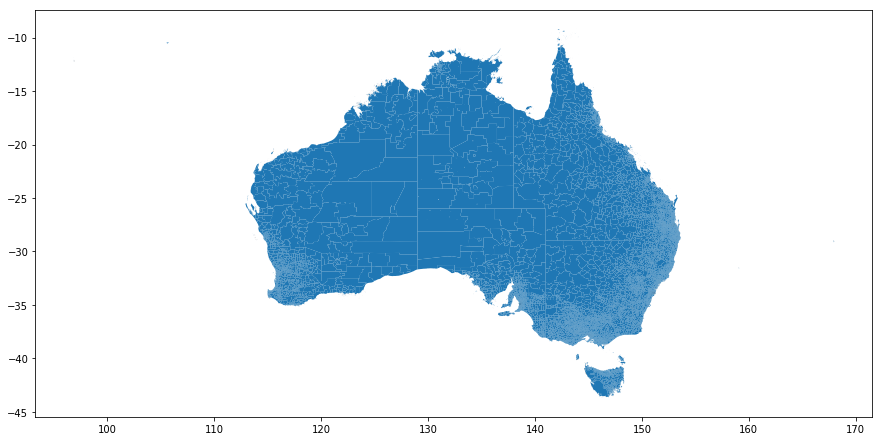

In [8]:
s_boundry.plot(figsize=(15,15))

In [9]:
s_boundry['ste_name16'].unique()

array(['New South Wales', 'Victoria', 'South Australia', 'Queensland',
       'Western Australia', 'Tasmania', 'Other Territories',
       'Northern Territory', 'Australian Capital Territory'], dtype=object)

### Data processing...
The data processing will contains multiple steps including
- Residential Property Transaction Data  
..* Clearning, filtering the data by suburb  
..* Extracting transaction data for 2017 only (The original data contains multiple multiple years data)  
..* Calculate parameters to measuring housing affordability e.g. median housing price per type
- Geospatial Boundry Data  
..* Extracting Melbourne suburb boundry data (The original data contains all suburb data across Australia)  
..* Calculating the centroid geocode e.g. latitude and longitude. This is to be used as reference coordination to retrieve data from Foursquare.
- Foursquare Data  
..* Retrieving foursquare data based on the centroid of each suburb.  
..* Converting json file to pandas dataframe.  
..* Intergrating data from above step and eliminate duplicates input.   
- School Data  
..* Cleaning data to keep school rank and geospatial data (latitude, longitude)
..* Converting dataframe to geodataframe to processing

<b>Let's process the property transaction data first</b>

In [10]:
housing.head()

,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType
0,First National Real Estate Mike Brown,9500000,2017-06-16,111 Mangans Rd,3140,Lilydale,-37.754930,145.371809,33285,m2,30,16,28,house
1,Marshall White,8150000,2017-05-23,7 Dunraven Avenue,3142,Toorak,-37.845278,145.014403,634,m2,4,3,3,house
2,Aqua Real Estate,7250000,2014-10-17,11 Williams Road,3930,Mount Eliza,-38.174377,145.091247,17184,m2,7,6,5,house
3,Lindellas Real Estate,6850000,2017-02-22,701 Station Street,3128,Box Hill,-37.817247,145.123739,662,m2,1,1,1,house
4,Lindellas Real Estate,6680000,2016-08-11,9-11 Ellingworth Parade,3128,Box Hill,-37.820382,145.124578,928,m2,2,2,1,house


In [11]:
housing.shape

(98377, 14)

In [12]:
housing['DateSold'] =  pd.to_datetime(housing['DateSold'])

In [13]:
housing['geometry'] = list(zip(housing['Longitude'], housing['Latitude']))

In [14]:
housing = housing[housing['DateSold'].dt.year == 2017]

In [15]:
# This operation is to get the housing price by suburb (Locality) to calculate housing index
house_price = housing.groupby(['Locality']).describe()

In [16]:
house_price.head()

Bathrooms                                              Bedrooms  \
                 count      mean       std  min  25%  50%  75%  max    count   
Locality                                                                       
Abbotsford        11.0  1.636364  1.501514  1.0  1.0  1.0  1.5  6.0     11.0   
Aberfeldie        15.0  1.666667  0.617213  1.0  1.0  2.0  2.0  3.0     15.0   
Airport West      35.0  1.628571  0.645606  1.0  1.0  2.0  2.0  3.0     35.0   
Albanvale         33.0  1.484848  0.667140  1.0  1.0  1.0  2.0  4.0     33.0   
Albert Park        3.0  1.333333  0.577350  1.0  1.0  1.0  1.5  2.0      3.0   

                                                          LandSize  \
                  mean       std  min  25%  50%  75%  max    count   
Locality                                                             
Abbotsford    2.727273  1.190874  2.0  2.0  2.0  3.0  6.0     11.0   
Aberfeldie    3.133333  0.833809  2.0  3.0  3.0  3.5  5.0     15.0   
Airport West  3.000000  0.342997  2.0  3.0  3.0  3.0  4.0     35.0   
Albanvale     3.363636  0.699025  3.0  3.0  3.0  4.0  6.0     33.0   
Albert Park   2.666667  0.577350  2.0  2.5  3.0  3.0  3.0      3.0   

                                                                         \
                    mean         std    min    25%    50%    75%    max   
Locality                                                                  
Abbotsford    188.363636   96.163686   68.0  135.0  143.0  250.5  357.0   
Aberfeldie    532.333333  185.387496  224.0  387.0  547.0  642.0  858.0   
Airport West  510.571429  206.510829  143.0  309.5  551.0  696.5  841.0   
Albanvale     562.484848   60.407533  388.0  532.0  543.0  600.0  707.0   
Albert Park   196.666667   44.814432  145.0  182.5  220.0  222.5  225.0   

             Latitude                                                        \
                count       mean       std        min        25%        50%   
Locality                                                                      
Abbotsford       11.0 -37.804400  0.003664 -37.810517 -37.807078 -37.803120   
Aberfeldie       15.0 -37.759906  0.002385 -37.763856 -37.761190 -37.760373   
Airport West     35.0 -37.726200  0.003927 -37.733552 -37.728828 -37.726617   
Albanvale        33.0 -37.745528  0.002923 -37.750609 -37.747452 -37.744990   
Albert Park       3.0 -37.842309  0.001870 -37.843893 -37.843341 -37.842789   

                                   Longitude                        \
                    75%        max     count        mean       std   
Locality                                                             
Abbotsford   -37.801552 -37.800931      11.0  144.998734  0.003696   
Aberfeldie   -37.758350 -37.755631      15.0  144.896499  0.004443   
Airport West -37.722794 -37.719285      35.0  144.880689  0.005891   
Albanvale    -37.742873 -37.741303      33.0  144.769209  0.004687   
Albert Park  -37.841518 -37.840246       3.0  144.952951  0.003675   

                                                                          \
                     min         25%         50%         75%         max   
Locality                                                                   
Abbotsford    144.994923  144.995780  144.998336  145.000660  145.007127   
Aberfeldie    144.889107  144.894532  144.896130  144.898506  144.906191   
Airport West  144.867844  144.876602  144.882363  144.885309  144.888777   
Albanvale     144.760901  144.766927  144.770025  144.771791  144.777852   
Albert Park   144.949178  144.951167  144.953156  144.954837  144.956519   

             ParkingSpaces                                               \
                     count      mean       std  min  25%  50%  75%  max   
Locality                                                                  
Abbotsford            11.0  0.818182  1.167748  0.0  0.0  1.0  1.0  4.0   
Aberfeldie            15.0  1.666667  0.617213  1.0  1.0  2.0  2.0  3.0   
Airport West          35.0  1.77

In [67]:
house_price = house_price['Price']

In [71]:
# Save the pre-processed housing price dataframe into csv file for next step analysis...

house_price.to_csv('./data/house_price.csv', index=True)

In [19]:
housing.Locality.nunique()

454

In [158]:
suburb = housing.drop_duplicates(subset=['Locality'])

In [159]:
from shapely.geometry import Point

In [160]:
geometry = [Point(xy) for xy in zip(suburb['Longitude'], suburb['Latitude'])]

In [162]:
crs = {'init': 'epsg:4326'}
suburb = gpd.GeoDataFrame(suburb, geometry=geometry, crs=crs)

In [163]:
suburb.head()

,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType,geometry
0,First National Real Estate Mike Brown,9500000,2017-06-16,111 Mangans Rd,3140,Lilydale,-37.754930,145.371809,33285,m2,30,16,28,house,POINT (145.371809 -37.75493)
1,Marshall White,8150000,2017-05-23,7 Dunraven Avenue,3142,Toorak,-37.845278,145.014403,634,m2,4,3,3,house,POINT (145.014403 -37.845278)
2,Aqua Real Estate,7250000,2014-10-17,11 Williams Road,3930,Mount Eliza,-38.174377,145.091247,17184,m2,7,6,5,house,POINT (145.091247 -38.174377)
3,Lindellas Real Estate,6850000,2017-02-22,701 Station Street,3128,Box Hill,-37.817247,145.123739,662,m2,1,1,1,house,POINT (145.123739 -37.817247)
5,Barry Plant,6520000,2015-09-21,19-35 Graham Road,3084,Viewbank,-37.741765,145.084133,9370,m2,7,8,0,house,POINT (145.084133 -37.741765)


In [164]:
type(suburb)

geopandas.geodataframe.GeoDataFrame

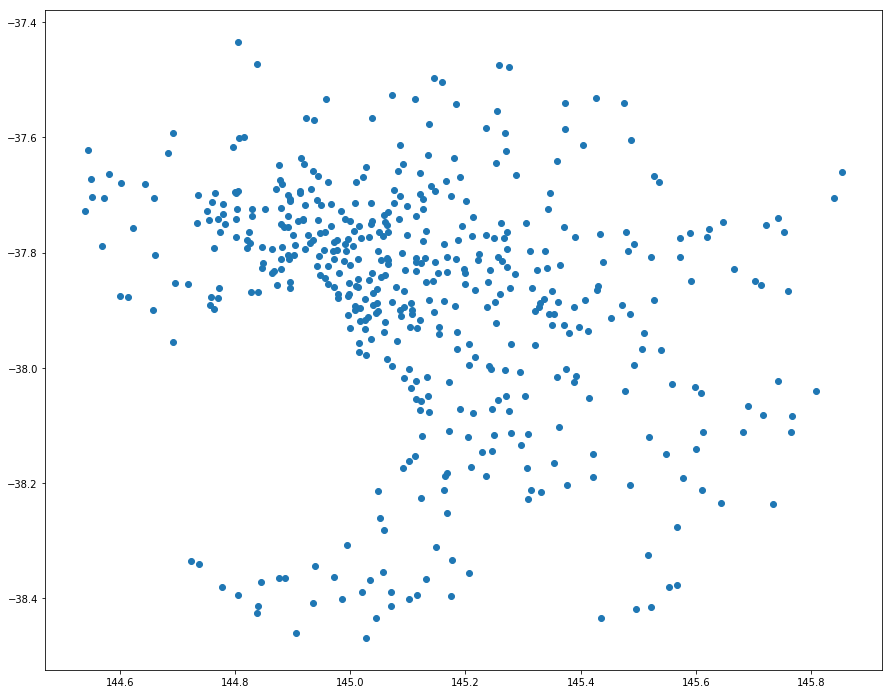

In [165]:
suburb.plot(figsize=(15,15))

<b>Now, let's focus on the ABS geospatial data. The purpose of this step is to build a shared reference system among different data
We will be using the ABS ssc_code as reference column for later merger operations</b>

In [193]:
s_boundry = s_boundry[s_boundry['ste_name16']=='Victoria']

In [194]:
# Because the suburb names in property transaction data are different from the ABS (Australian Bearua of Statistics)
# we used geopandas' spatial join function (whether the spatial points will fall into the spatial polygon) 
# to merge the data 
melbourne = gpd.sjoin(s_boundry, suburb, how='inner', op='intersects')

In [195]:
melbourne.head()

,gid,ssc_code16,ssc_name16,ste_code16,ste_name16,areasqkm16,geometry,index_right,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType
296,5299,SSC20773,Doreen,2,Victoria,32.2357,"POLYGON ((145.113752016 -37.58811400899998, 14...",1630,Barry Plant Doreen,2050000,2017-09-05,62-64 Laurimar Hill Drive,3754,Doreen,-37.576098,145.136744,3698,m2,6,3,3,house
349,5878,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,90479,Mason White McDougall,345000,2015-07-17,14 Marks Road,3757,Pheasant Creek,-37.477144,145.275214,4410,m2,3,1,2,house
349,5878,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,30267,Integrity Real Estate (Yarra Valley) Pty Ltd,760000,2017-01-27,51 Plover Way,3757,Kinglake West,-37.473802,145.258833,20272,m2,6,3,5,house
776,5735,SSC21209,Huntingdale (Vic.),2,Victoria,0.7978,"POLYGON ((145.104110285 -37.90790234499997, 14...",5377,Ray White,1452000,2017-04-29,22 Greville Street,3166,Huntingdale,-37.906334,145.108068,604,m2,4,2,3,house
819,6483,SSC21957,North Warrandyte,2,Victoria,8.7661,POLYGON ((145.1950009420001 -37.72731579799995...,4609,Ray White,1520000,2017-09-12,33 Bradleys Lane,3113,North Warrandyte,-37.738062,145.213390,5362,m2,4,3,2,house


In [196]:
melbourne.columns

Index(['gid', 'ssc_code16', 'ssc_name16', 'ste_code16', 'ste_name16',
       'areasqkm16', 'geometry', 'index_right', 'Agency', 'Price', 'DateSold',
       'StreetAddress', 'Postcode', 'Locality', 'Latitude', 'Longitude',
       'LandSize', 'LandSizeUnit', 'Bedrooms', 'Bathrooms', 'ParkingSpaces',
       'PropertyType'],
      dtype='object')

In [197]:
melbourne = melbourne[['ssc_code16', 'ssc_name16', 'ste_code16', 'ste_name16',
       'areasqkm16', 'geometry', 'Locality']]

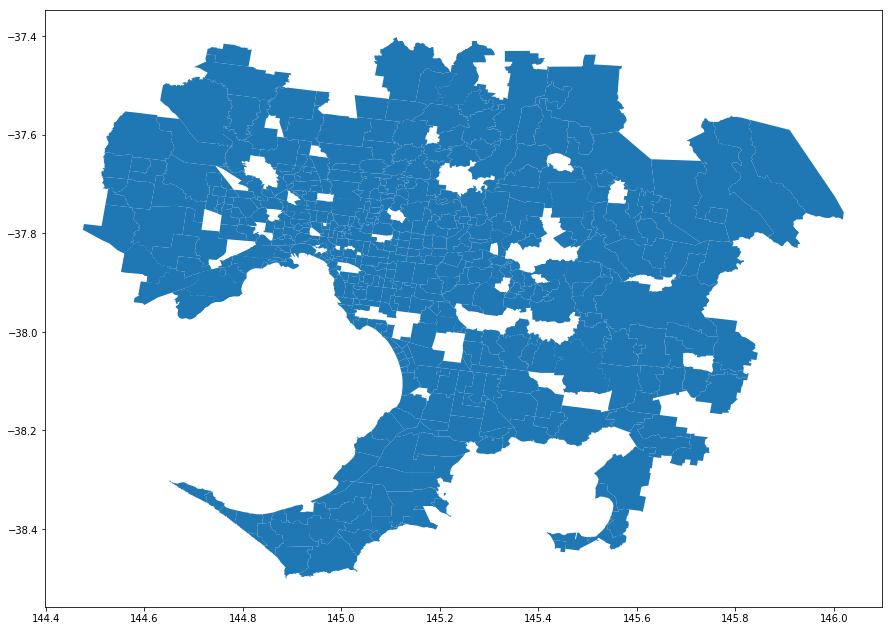

In [198]:
melbourne.plot(figsize=(15,15))

In [174]:
melbourne.reset_index(drop=True, inplace=True)

In [35]:
# Save the processed locality data into csv file for next step

melbourne.to_csv('./data/locality.csv', index=False)

<b>Then we start to process the Foursquare data that we downloaded in previous section</b>

In [36]:
from pandas.io.json import json_normalize

In [38]:
# Load the coffee data from previous json dump from Foursquare

with open('./data/coffee.json') as json_data:
    c = json.load(json_data)

In [39]:
coffee = json_normalize(c['response']['groups'][0]['items'])

In [40]:
coffee.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5153695ce4b02965ee259940-0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",5153695ce4b02965ee259940,247 Flinders Ln.,AU,Melbourne,Australia,NaN,193,"[247 Flinders Ln., Melbourne VIC 3000, Australia]","[{'label': 'display', 'lat': -37.8167630297948...",-37.816763,144.966064,NaN,3000,VIC,Dukes Coffee Roasters,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b058748f964a520cf8822e3-1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",4b058748f964a520cf8822e3,359 Little Bourke St,AU,Melbourne,Australia,NaN,694,"[359 Little Bourke St, Melbourne VIC 3000, Aus...","[{'label': 'display', 'lat': -37.8134453152653...",-37.813445,144.962137,NaN,3000,VIC,Brother Baba Budan,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4ee91d794901e2d61a51221b-2,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",4ee91d794901e2d61a51221b,493-495 Little Bourke St,AU,Melbourne,Australia,at Little William St,872,[493-495 Little Bourke St (at Little William S...,"[{'label': 'display', 'lat': -37.8145977053813...",-37.814598,144.958350,NaN,3000,VIC,Patricia Coffee Brewers,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-548e129b498e3012587f3e5c-3,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",548e129b498e3012587f3e5c,20 Drewery Ln,AU,Melbourne,Australia,Lonsdale St,867,"[20 Drewery Ln (Lonsdale St), Melbourne VIC 30...","[{'label': 'display', 'lat': -37.8108599377085...",-37.810860,144.964180,NaN,3000,VIC,Little Rogue Coffee,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-55e6828a498eb23090956e29-4,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",55e6828a498eb23090956e29,33 Guildford Ln,AU,Melbourne CBD,Australia,NaN,1005,"[33 Guildford Ln, Melbourne CBD VIC 3000, Aust...","[{'label': 'display', 'lat': -37.8113411762781...",-37.811341,144.959816,NaN,3000,VIC,Brick Lane,0,[],NaN


In [44]:
coffee.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.id', 'venue.location.address', 'venue.location.cc',
       'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.neighborhood', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [47]:
coffee = coffee[['venue.location.formattedAddress', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode',
       'venue.location.state', 'venue.name']]

In [48]:
coffee.head()

,venue.location.formattedAddress,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name
0,"[247 Flinders Ln., Melbourne VIC 3000, Australia]",-37.816763,144.966064,3000,VIC,Dukes Coffee Roasters
1,"[359 Little Bourke St, Melbourne VIC 3000, Aus...",-37.813445,144.962137,3000,VIC,Brother Baba Budan
2,[493-495 Little Bourke St (at Little William S...,-37.814598,144.958350,3000,VIC,Patricia Coffee Brewers
3,"[20 Drewery Ln (Lonsdale St), Melbourne VIC 30...",-37.810860,144.964180,3000,VIC,Little Rogue Coffee
4,"[33 Guildford Ln, Melbourne CBD VIC 3000, Aust...",-37.811341,144.959816,3000,VIC,Brick Lane


In [49]:
# Save the coffee file into csv file for next step

coffee.to_csv('./data/coffee.csv', index=False)

In [50]:
# Load the food data from previous dump from Foursquare

with open('./data/food.json') as json_data:
    d = json.load(json_data)

In [53]:
food = json_normalize(d['response']['groups'][0]['items'])

In [54]:
food.head()

,reasons.count,reasons.items,referralId,venue.categories,venue.id,venue.location.address,venue.location.cc,venue.location.city,venue.location.country,venue.location.crossStreet,venue.location.distance,venue.location.formattedAddress,venue.location.labeledLatLngs,venue.location.lat,venue.location.lng,venue.location.neighborhood,venue.location.postalCode,venue.location.state,venue.name,venue.photos.count,venue.photos.groups,venue.venuePage.id
0,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4dde183352b155583df9b62e-0,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",4dde183352b155583df9b62e,125 Flinders Ln,AU,Melbourne,Australia,at Higson Ln,417,"[125 Flinders Ln (at Higson Ln), Melbourne VIC...","[{'label': 'display', 'lat': -37.8154505859983...",-37.815451,144.970189,Melbourne CBD,3000,VIC,Chin Chin,0,[],NaN
1,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4b1c842df964a520140824e3-1,"[{'id': '52e81612bcbc57f1066b79f2', 'name': 'C...",4b1c842df964a520140824e3,"Shop 2, 241 Flinders Ln",AU,Melbourne,Australia,at Scott Alley,183,"[Shop 2, 241 Flinders Ln (at Scott Alley), Mel...","[{'label': 'display', 'lat': -37.8167790703066...",-37.816779,144.966295,NaN,3000,VIC,Roule Galette,0,[],NaN
2,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-4be735706af1ef3bb0831b96-2,"[{'id': '4bf58dd8d48988d169941735', 'name': 'A...",4be735706af1ef3bb0831b96,187 Flinders Ln,AU,Melbourne,Australia,btwn Russell St & Swanston St,269,[187 Flinders Ln (btwn Russell St & Swanston S...,"[{'label': 'display', 'lat': -37.8160753058551...",-37.816075,144.968314,NaN,3000,VIC,ezard,0,[],NaN
3,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-5368ad36498eb3c4cc6e52a8-3,"[{'id': '4bf58dd8d48988d142941735', 'name': 'A...",5368ad36498eb3c4cc6e52a8,180 Flinders Ln,AU,Melbourne,Australia,Watson Pl,279,"[180 Flinders Ln (Watson Pl), Melbourne VIC 30...","[{'label': 'display', 'lat': -37.8160025562122...",-37.816003,144.968388,NaN,3000,VIC,Supernormal,0,[],NaN
4,0,"[{'summary': 'This spot is popular', 'type': '...",e-0-54631f6e498ed0dde017e53c-4,"[{'id': '4bf58dd8d48988d110941735', 'name': 'I...",54631f6e498ed0dde017e53c,361 Little Bourke St,AU,Melbourne,Australia,NaN,696,"[361 Little Bourke St, Melbourne VIC 3000, Aus...","[{'label': 'display', 'lat': -37.8135265165961...",-37.813527,144.961978,Melbourne CBD,3000,VIC,Tipo 00,0,[],NaN


In [55]:
food = food[['venue.location.formattedAddress', 'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode',
       'venue.location.state', 'venue.name']]

In [56]:
# Save the food dataframe into csv file for next step

food.to_csv('./data/food.csv', index=False)

<b>Finally, it's time to process the school data</b>

In [57]:
school.head()

,Suburb,Post,School,Score,English Star,Maths Star,Enroll,Type,Pri/Sec?,Coed?,Religion,Other,Address,Telephone,Latitude,Longitude,2016,2015,2014,2013,2012,2011,2010,2009
0,Aberfeldie,3040,Lowther Hall Anglican Grammar School,96,5,4,788,Independent,Primary/Secondary Combined,Girls,Anglican,NaN,17 Leslie Road Essendon VIC,03 9337 5011,-37.7574,144.915,51.0,35.0,50.0,51.0,31.0,16.0,NaN,35.0
1,Carlton,3053,Carlton Primary School,74,3,2,97,Government,Primary,Coed,Non-Denominational,NaN,Neill Street Carlton VIC,03 9347 6022,-37.794,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carlton North,3054,Carlton North Primary School,93,5,4,253,Government,Primary,Coed,Non-Denominational,NaN,Lee Street Carlton North VIC,03 9347 4822,-37.7912,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Carlton North,3054,Princes Hill Primary School,86,4,4,449,Government,Primary,Coed,Non-Denominational,NaN,Pigdon Street Carlton North VIC,03 9389 5300,-37.7825,144.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flemington,3031,Kensington Primary School,92,5,4,469,Government,Primary,Coed,Non-Denominational,NaN,McCracken Street Kensington VIC,03 9376 6013,-37.7937,144.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
school = school[['School', 'Score', 'Latitude', 'Longitude', 'Suburb', 'Post']]
school['Latitude'] = pd.to_numeric(school['Latitude'], errors='coerce')
school['Longitude'] = pd.to_numeric(school['Longitude'], errors='coerce')

In [59]:
geometry = [Point(xy) for xy in zip(school['Longitude'], school['Latitude'])]

In [60]:
crs = {'init': 'epsg:4326'}
school = gpd.GeoDataFrame(school, geometry=geometry, crs=crs)

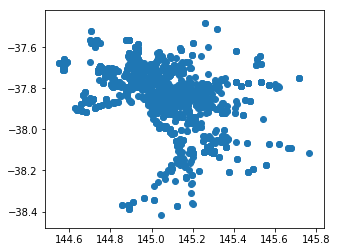

In [61]:
school.plot()

In [62]:
# Save school dataframe into csv file for next step

school.to_csv('./data/school.csv', index=False)

# The analysis section

<b>First, we need to calculate the housing affordability index</b>

In [76]:
h_affordability = pd.read_csv('./data/house_price.csv')

In [81]:
h_affordability.head()

,Locality,count,mean,std,min,25%,50%,75%,max,index,affordability
0,Abbotsford,11.0,1.222591e+06,386372.671017,472500.0,1007500.0,1220000.0,1395000.0,1830000.0,3.790984,3.790984
1,Aberfeldie,15.0,1.463233e+06,395235.954240,910000.0,1158750.0,1515000.0,1770000.0,2050000.0,3.052805,3.052805
2,Airport West,35.0,8.819600e+05,134509.599920,620100.0,795000.0,865000.0,968750.0,1250000.0,5.346821,5.346821
3,Albanvale,33.0,5.419697e+05,56999.306382,415000.0,500000.0,540000.0,572000.0,687500.0,8.564815,8.564815
4,Albert Park,3.0,2.016667e+06,473532.821812,1500000.0,1810000.0,2120000.0,2275000.0,2430000.0,2.181604,2.181604


In [80]:
h_affordability['affordability'] = h_affordability['50%'].max()/h_affordability['50%']

<b>Next, we'll calculate the education quality index</b>

In [82]:
education = pd.read_csv('./data/school.csv')

In [83]:
education.head()

,School,Score,Latitude,Longitude,Suburb,Post,geometry
0,Lowther Hall Anglican Grammar School,96,-37.757411,144.915075,Aberfeldie,3040,POINT (144.9150747 -37.7574113)
1,Carlton Primary School,74,-37.794049,144.972116,Carlton,3053,POINT (144.9721165 -37.7940492)
2,Carlton North Primary School,93,-37.791210,144.971647,Carlton North,3054,POINT (144.971647 -37.7912098)
3,Princes Hill Primary School,86,-37.782504,144.976524,Carlton North,3054,POINT (144.9765235 -37.7825041)
4,Kensington Primary School,92,-37.793733,144.927505,Flemington,3031,POINT (144.9275053 -37.7937328)


In [85]:
education.dtypes

School        object
Score          int64
Latitude     float64
Longitude    float64
Suburb        object
Post           int64
geometry      object
dtype: object

In [88]:
education = education[education['Score']>=90]

In [91]:
edu_index = education.groupby(education['Suburb']).describe()

In [93]:
edu_index = edu_index['Score']

In [94]:
edu_index.head()

,count,mean,std,min,25%,50%,75%,max
Suburb,,,,,,,,
Aberfeldie,7.0,92.571429,2.439750,90.0,91.00,92.0,94.00,96.0
Albert Park,2.0,94.500000,3.535534,92.0,93.25,94.5,95.75,97.0
Albion,1.0,97.000000,NaN,97.0,97.00,97.0,97.00,97.0
Alphington,5.0,93.000000,3.535534,90.0,91.00,92.0,93.00,99.0
Altona,3.0,91.666667,2.886751,90.0,90.00,90.0,92.50,95.0


In [96]:
edu_index.rename(columns={'count':'edu_index'}, inplace=True)

In [97]:
edu_index.head()

,edu_index,mean,std,min,25%,50%,75%,max
Suburb,,,,,,,,
Aberfeldie,7.0,92.571429,2.439750,90.0,91.00,92.0,94.00,96.0
Albert Park,2.0,94.500000,3.535534,92.0,93.25,94.5,95.75,97.0
Albion,1.0,97.000000,NaN,97.0,97.00,97.0,97.00,97.0
Alphington,5.0,93.000000,3.535534,90.0,91.00,92.0,93.00,99.0
Altona,3.0,91.666667,2.886751,90.0,90.00,90.0,92.50,95.0


<b>Then, Let's calculate food and coffee accessiblity</b>

In [234]:
coffee_index = pd.read_csv('./data/coffee.csv')

In [235]:
coffee_index.head()

,venue.location.formattedAddress,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name
0,"['247 Flinders Ln.', 'Melbourne VIC 3000', 'Au...",-37.816763,144.966064,3000.0,VIC,Dukes Coffee Roasters
1,"['359 Little Bourke St', 'Melbourne VIC 3000',...",-37.813445,144.962137,3000.0,VIC,Brother Baba Budan
2,['493-495 Little Bourke St (at Little William ...,-37.814598,144.958350,3000.0,VIC,Patricia Coffee Brewers
3,"['20 Drewery Ln (Lonsdale St)', 'Melbourne VIC...",-37.810860,144.964180,3000.0,VIC,Little Rogue Coffee
4,"['33 Guildford Ln', 'Melbourne CBD VIC 3000', ...",-37.811341,144.959816,3000.0,VIC,Brick Lane


In [236]:
from shapely.geometry import Point

In [237]:
geometry = [Point(xy) for xy in zip(coffee_index['venue.location.lng'], coffee_index['venue.location.lat'])]

In [238]:
crs = {'init': 'epsg:4326'}
coffee_index = gpd.GeoDataFrame(coffee_index, geometry=geometry, crs=crs)

In [239]:
coffee_index = gpd.sjoin(melbourne, coffee_index, how='left', op='intersects', )

In [240]:
coffee_index = coffee_index[['ssc_code16', 'ssc_name16', 'Locality', 'venue.name']]

In [241]:
import numpy as np
coffee_index['coffee_accessibility'] = np.where(coffee_index['venue.name'].isnull(), 0, 1)

In [260]:
coffee_index.shape

(546, 5)

##### Let's calculate food accessibility index now

In [216]:
food_index = pd.read_csv('./data/food.csv')

In [217]:
from shapely.geometry import Point

In [218]:
geometry = [Point(xy) for xy in zip(food_index['venue.location.lng'], food_index['venue.location.lat'])]

In [219]:
crs = {'init': 'epsg:4326'}
food_index = gpd.GeoDataFrame(food_index, geometry=geometry, crs=crs)

In [220]:
food_index = gpd.sjoin(melbourne, food_index, how='left', op='intersects', )

In [221]:
food_index.head()

,ssc_code16,ssc_name16,ste_code16,ste_name16,areasqkm16,geometry,Locality,index_right,venue.location.formattedAddress,venue.location.lat,venue.location.lng,venue.location.postalCode,venue.location.state,venue.name
296,SSC20773,Doreen,2,Victoria,32.2357,"POLYGON ((145.113752016 -37.58811400899998, 14...",Doreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,Pheasant Creek,NaN,NaN,NaN,NaN,NaN,NaN,NaN
349,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,Kinglake West,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,SSC21209,Huntingdale (Vic.),2,Victoria,0.7978,"POLYGON ((145.104110285 -37.90790234499997, 14...",Huntingdale,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,SSC21957,North Warrandyte,2,Victoria,8.7661,POLYGON ((145.1950009420001 -37.72731579799995...,North Warrandyte,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [206]:
type(food_index)

pandas.core.frame.DataFrame

In [223]:
food_index = food_index[['ssc_code16', 'ssc_name16', 'Locality', 'venue.name']]

In [232]:
import numpy as np
food_index['food_accessibility'] = np.where(food_index['venue.name'].isnull(), 0, 1)

In [259]:
food_index.shape

(562, 5)

In [242]:
food_index.head()

,ssc_code16,ssc_name16,Locality,venue.name,food_accessibility
296,SSC20773,Doreen,Doreen,NaN,0
349,SSC21352,Kinglake West,Pheasant Creek,NaN,0
349,SSC21352,Kinglake West,Kinglake West,NaN,0
776,SSC21209,Huntingdale (Vic.),Huntingdale,NaN,0
819,SSC21957,North Warrandyte,North Warrandyte,NaN,0


In [243]:
food_index.reset_index(drop=True, inplace=True)

#### Finally, let's merge all tables together to calculate the liveablity index

In [244]:
h_affordability.head()

,Locality,count,mean,std,min,25%,50%,75%,max,index,affordability
0,Abbotsford,11.0,1.222591e+06,386372.671017,472500.0,1007500.0,1220000.0,1395000.0,1830000.0,3.790984,3.790984
1,Aberfeldie,15.0,1.463233e+06,395235.954240,910000.0,1158750.0,1515000.0,1770000.0,2050000.0,3.052805,3.052805
2,Airport West,35.0,8.819600e+05,134509.599920,620100.0,795000.0,865000.0,968750.0,1250000.0,5.346821,5.346821
3,Albanvale,33.0,5.419697e+05,56999.306382,415000.0,500000.0,540000.0,572000.0,687500.0,8.564815,8.564815
4,Albert Park,3.0,2.016667e+06,473532.821812,1500000.0,1810000.0,2120000.0,2275000.0,2430000.0,2.181604,2.181604


In [247]:
edu_index['Locality'] = edu_index.index

In [248]:
edu_index.head()

,edu_index,mean,std,min,25%,50%,75%,max,Locality
Suburb,,,,,,,,,
Aberfeldie,7.0,92.571429,2.439750,90.0,91.00,92.0,94.00,96.0,Aberfeldie
Albert Park,2.0,94.500000,3.535534,92.0,93.25,94.5,95.75,97.0,Albert Park
Albion,1.0,97.000000,NaN,97.0,97.00,97.0,97.00,97.0,Albion
Alphington,5.0,93.000000,3.535534,90.0,91.00,92.0,93.00,99.0,Alphington
Altona,3.0,91.666667,2.886751,90.0,90.00,90.0,92.50,95.0,Altona


In [249]:
coffee_index.head()

,ssc_code16,ssc_name16,Locality,venue.name,coffee_accessibility
296,SSC20773,Doreen,Doreen,NaN,0
349,SSC21352,Kinglake West,Pheasant Creek,NaN,0
349,SSC21352,Kinglake West,Kinglake West,NaN,0
776,SSC21209,Huntingdale (Vic.),Huntingdale,NaN,0
819,SSC21957,North Warrandyte,North Warrandyte,NaN,0


In [257]:
combined = pd.merge(melbourne, h_affordability, how='left', on='Locality')

In [258]:
combined.shape

(483, 17)

In [267]:
combined = pd.merge(combined, edu_index, how='left', on='Locality')

In [268]:
combined.shape

(483, 25)

In [269]:
combined = pd.merge(combined, coffee_index, how='left', on='Locality')

In [270]:
combined.shape

(546, 29)

In [271]:
combined = pd.merge(combined, food_index, how='left', on='Locality')

In [275]:
combined.shape

(483, 33)

In [273]:
combined.drop_duplicates(subset=['Locality'], inplace=True)

In [274]:
combined.head()

,ssc_code16_x,ssc_name16_x,ste_code16,ste_name16,areasqkm16,geometry,Locality,count,mean_x,std_x,min_x,25%_x,50%_x,75%_x,max_x,index,affordability,edu_index,mean_y,std_y,min_y,25%_y,50%_y,75%_y,max_y,ssc_code16_y,ssc_name16_y,venue.name_x,coffee_accessibility,ssc_code16,ssc_name16,venue.name_y,food_accessibility
0,SSC20773,Doreen,2,Victoria,32.2357,"POLYGON ((145.113752016 -37.58811400899998, 14...",Doreen,277.0,6.088318e+05,184757.034929,268000.0,508000.0,576000.0,678500.0,2050000.0,8.029514,8.029514,1.0,93.0,NaN,93.0,93.0,93.0,93.0,93.0,SSC20773,Doreen,NaN,0,SSC20773,Doreen,NaN,0
1,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,Pheasant Creek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSC21352,Kinglake West,NaN,0,SSC21352,Kinglake West,NaN,0
2,SSC21352,Kinglake West,2,Victoria,65.3005,POLYGON ((145.2504257910001 -37.42824635099998...,Kinglake West,10.0,6.211500e+05,88617.169768,460000.0,588000.0,626500.0,680500.0,760000.0,7.382283,7.382283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSC21352,Kinglake West,NaN,0,SSC21352,Kinglake West,NaN,0
3,SSC21209,Huntingdale (Vic.),2,Victoria,0.7978,"POLYGON ((145.104110285 -37.90790234499997, 14...",Huntingdale,11.0,1.187164e+06,127062.561541,1080000.0,1116000.0,1145000.0,1171000.0,1452000.0,4.039301,4.039301,5.0,95.6,2.607681,92.0,94.0,96.0,98.0,98.0,SSC21209,Huntingdale (Vic.),NaN,0,SSC21209,Huntingdale (Vic.),NaN,0
4,SSC21957,North Warrandyte,2,Victoria,8.7661,POLYGON ((145.1950009420001 -37.72731579799995...,North Warrandyte,9.0,1.241000e+06,273688.691765,791000.0,1110000.0,1299000.0,1451000.0,1520000.0,3.560431,3.560431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SSC21957,North Warrandyte,NaN,0,SSC21957,North Warrandyte,NaN,0


In [276]:
combined.columns

Index(['ssc_code16_x', 'ssc_name16_x', 'ste_code16', 'ste_name16',
       'areasqkm16', 'geometry', 'Locality', 'count', 'mean_x', 'std_x',
       'min_x', '25%_x', '50%_x', '75%_x', 'max_x', 'index', 'affordability',
       'edu_index', 'mean_y', 'std_y', 'min_y', '25%_y', '50%_y', '75%_y',
       'max_y', 'ssc_code16_y', 'ssc_name16_y', 'venue.name_x',
       'coffee_accessibility', 'ssc_code16', 'ssc_name16', 'venue.name_y',
       'food_accessibility'],
      dtype='object')

In [277]:
combined = combined[['Locality', 'geometry', 'affordability', 'edu_index', 'coffee_accessibility', 'food_accessibility']]

In [280]:
combined.fillna(value=0, inplace=True)

In [282]:
combined['Liveablity'] = combined['affordability']*0.6 + combined['edu_index']*0.4 + combined['coffee_accessibility']*0.05 + combined['food_accessibility']*0.05

In [289]:
combined.sort_values(by='Liveablity', ascending=False, inplace=True)

In [290]:
combined = combined[['Locality', 'geometry', 'Liveablity']]

In [293]:
combined = gpd.GeoDataFrame(combined, geometry='geometry')

In [294]:
type(combined)

geopandas.geodataframe.GeoDataFrame

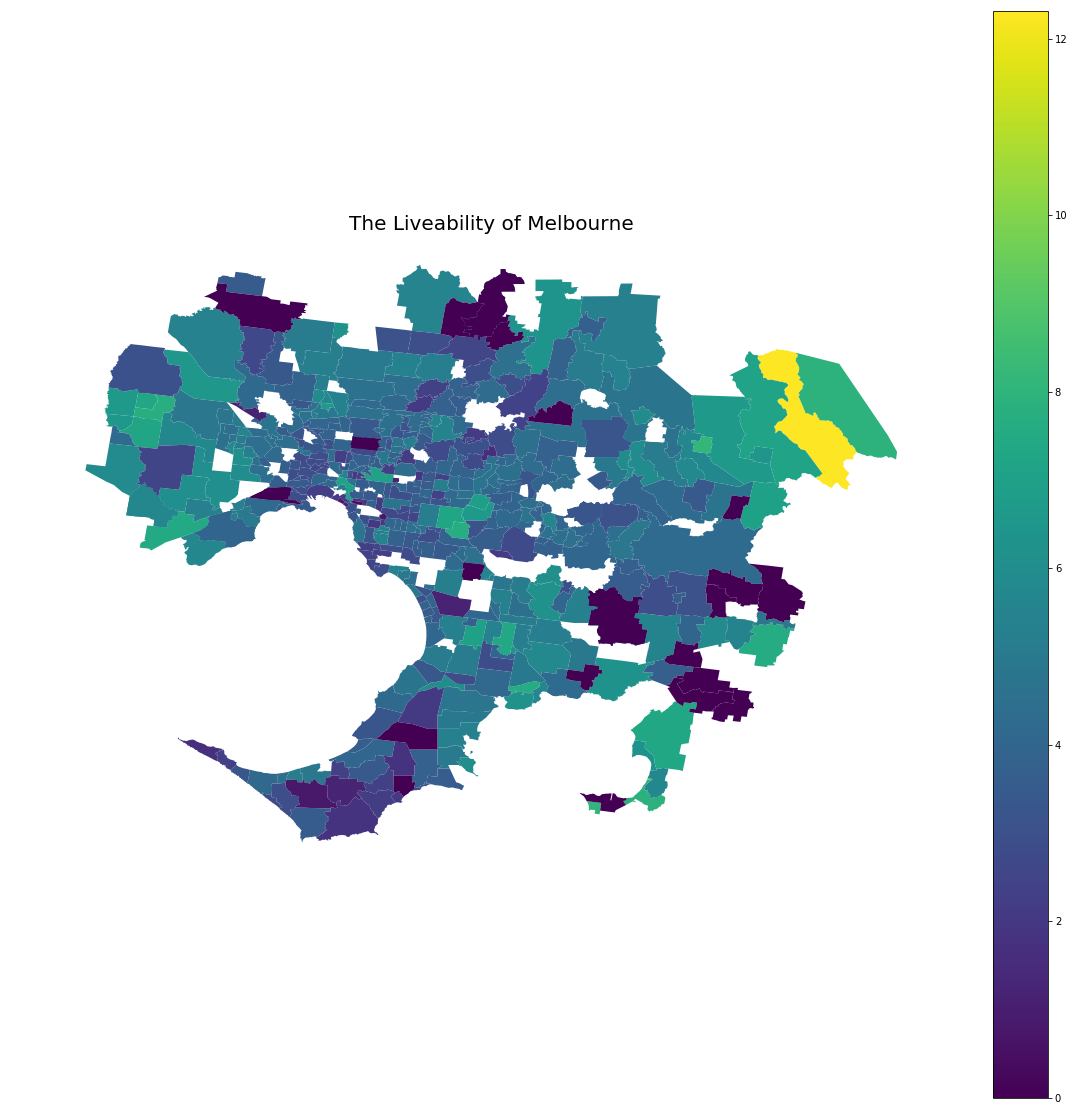

In [306]:
ax = combined.plot(column='Liveablity', figsize=(20,20), legend=True)
ax.set_title("The Liveability of Melbourne", fontdict={'fontsize': 20}, loc='Center')
ax.set_axis_off()

In [307]:
combined.head(n=10)

,Locality,geometry,Liveablity
70,McMahons Creek,POLYGON ((145.7951409870001 -37.71721500099994...,12.319645
2586,Pioneer Bay,POLYGON ((145.5473696790001 -38.37921080599995...,9.280936
2550,Millgrove,"POLYGON ((145.639381252 -37.75797216599994, 14...",8.137830
327,Coronet Bay,POLYGON ((145.4538318230001 -38.44737248299998...,8.072727
89,Reefton,POLYGON ((145.8485528240001 -37.68439707399995...,7.928571
49,Grantville,"POLYGON ((145.536536626 -38.39377287699995, 14...",7.872340
2542,Melton,POLYGON ((144.5711385620001 -37.67301387599997...,7.708333
102,Wheelers Hill,POLYGON ((145.1608987730001 -37.90639844299994...,7.613043
511,Longwarry,POLYGON ((145.7520232810001 -38.10397426199995...,7.602740
23,Cannons Creek,POLYGON ((145.3071837650001 -38.21415759799993...,7.561122


### This is the end of code